# Part 2.1

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow_hub as hub

In [ ]:
# To Avoid GPU errors
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# load MINIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
url = "https://tfhub.dev/tensorflow/tfgan/eval/mnist/logits/1"

In [ ]:
base_model = hub.KerasLayer(url, input_shape=(28, 28, 1))

In [ ]:
model = keras.Sequential(
    [
        base_model,
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10)
    ]
)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 13s - loss: 0.0581 - accuracy: 0.9856 - 13s/epoch - 7ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.0295 - accuracy: 0.9905 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.0271 - accuracy: 0.9914 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.0262 - accuracy: 0.9918 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.0248 - accuracy: 0.9922 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.0236 - accuracy: 0.9924 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.0234 - accuracy: 0.9927 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.0230 - accuracy: 0.9927 - 4s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 4s - loss: 0.0211 - accuracy: 0.9933 - 4s/epoch - 2ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.0214 - accuracy: 0.9929 - 4s/epoch - 2ms/step


# Part 2.2

In [ ]:
# Get data (10% of labels)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-04-21 23:14:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 142.251.16.128, 142.251.45.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   236MB/s    in 0.7s    

2022-04-21 23:14:44 (236 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


------------

Setting up callbacks

**Callbacks** are extra functionality you can add to your models to be performed during or after training.

**tensorboard callback**

In [ ]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

URLs used from TensorFlow Hub's pretrianed model.

When we use them in our model, the model will automatically be downloaded for us to use.

In [ ]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

In [ ]:
# Create model
# pass in the url，create model
resnet_model = create_model(resnet_url, num_classes=train_data_10_percent.num_classes)

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

now we use tensorboard callback

In [ ]:
# Fit the model
resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5,
                                  steps_per_epoch=len(train_data_10_percent),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20220421-231520
Epoch 1/5
24/24 [==============================] - 31s 732ms/step - loss: 1.8803 - accuracy: 0.3600 - val_loss: 1.1860 - val_accuracy: 0.6328
Epoch 2/5
24/24 [==============================] - 16s 689ms/step - loss: 0.8842 - accuracy: 0.7293 - val_loss: 0.8472 - val_accuracy: 0.7340
Epoch 3/5
24/24 [==============================] - 15s 657ms/step - loss: 0.6309 - accuracy: 0.8173 - val_loss: 0.7746 - val_accuracy: 0.7576
Epoch 4/5
24/24 [==============================] - 15s 661ms/step - loss: 0.4774 - accuracy: 0.8800 - val_loss: 0.7127 - val_accuracy: 0.7676
Epoch 5/5
24/24 [==============================] - 15s 655ms/step - loss: 0.3741 - accuracy: 0.9160 - val_loss: 0.6799 - val_accuracy: 0.7812


Model为ResNet

----------

In [ ]:
# Let's check out our model's training curves using our plot_loss_curves function.

import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

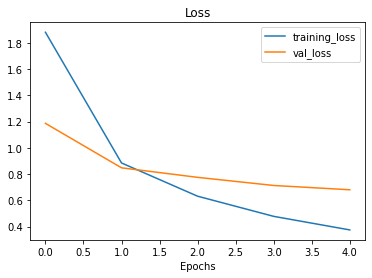

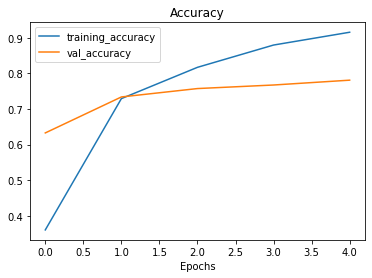

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
# Resnet summary 
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


---------------

**Try different url, which different pre-trained model

In [ ]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=train_data_10_percent.num_classes)

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data_10_percent, # only use 10% of training data
                                              epochs=5, # train for 5 epochs
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20220421-231824
Epoch 1/5
24/24 [==============================] - 26s 728ms/step - loss: 1.8664 - accuracy: 0.4160 - val_loss: 1.3232 - val_accuracy: 0.7152
Epoch 2/5
24/24 [==============================] - 15s 646ms/step - loss: 1.0825 - accuracy: 0.7653 - val_loss: 0.8770 - val_accuracy: 0.8200
Epoch 3/5
24/24 [==============================] - 15s 628ms/step - loss: 0.7666 - accuracy: 0.8320 - val_loss: 0.6984 - val_accuracy: 0.8388
Epoch 4/5
24/24 [==============================] - 15s 637ms/step - loss: 0.6142 - accuracy: 0.8587 - val_loss: 0.6094 - val_accuracy: 0.8532
Epoch 5/5
24/24 [==============================] - 15s 631ms/step - loss: 0.5182 - accuracy: 0.8893 - val_loss: 0.5538 - val_accuracy: 0.8588


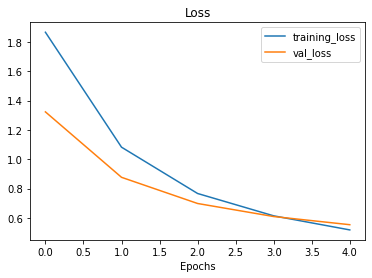

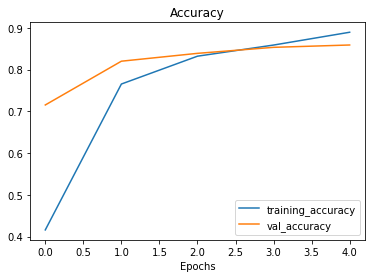

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________
